repo : [Predictive Maintenance: Exploratory Data Analysis][https://www.kaggle.com/arnabbiswas1/predictive-maintenance-exploratory-data-analysis]

In [2]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use("Solarize_Light2")

%matplotlib inline

In [3]:
def check_null(df):
    """
    Returns percentage of rows containing missing data
    """
    return df.isna().sum() * 100/len(df)


def get_missing_dates(series, start_date, end_date, freq="D"):
    """
    Returns the dates which are missing in the series
    date_sr between the start_date and end_date
    
    series: Series consisting of date
    start_date: Start date in String format
    end_date: End date in String format
    """
    return pd.date_range(
        start=start_date, end=end_date, freq=freq).difference(series)


def check_duplicate(df, subset):
    """
    Returns if there are any duplicate rows in the DataFrame.
    
    df: DataFrame under consideration
    subset: Optional List of feature names based on which 
            duplicate rows are being identified. 
    """
    if subset is not None: 
        return df.duplicated(subset=subset, keep=False).sum()
    else:
        return df.duplicated(keep=False).sum()


def create_date_features(source_df, target_df, feature_name):
    '''
    Create new features related to dates
    
    source_df : DataFrame consisting of the timestamp related feature
    target_df : DataFrame where new features will be added
    feature_name : Name of the feature of date type which needs to be decomposed.
    '''
    target_df.loc[:, 'year'] = source_df.loc[:, feature_name].dt.year.astype('uint16')
    target_df.loc[:, 'month'] = source_df.loc[:, feature_name].dt.month.astype('uint8')
    target_df.loc[:, 'quarter'] = source_df.loc[:, feature_name].dt.quarter.astype('uint8')
    target_df.loc[:, 'weekofyear'] = source_df.loc[:, feature_name].dt.isocalendar().week.astype('uint8')
    
    target_df.loc[:, 'hour'] = source_df.loc[:, feature_name].dt.hour.astype('uint8')
    
    target_df.loc[:, 'day'] = source_df.loc[:, feature_name].dt.day.astype('uint8')
    target_df.loc[:, 'dayofweek'] = source_df.loc[:, feature_name].dt.dayofweek.astype('uint8')
    target_df.loc[:, 'dayofyear'] = source_df.loc[:, feature_name].dt.dayofyear.astype('uint8')
    target_df.loc[:, 'is_month_start'] = source_df.loc[:, feature_name].dt.is_month_start
    target_df.loc[:, 'is_month_end'] = source_df.loc[:, feature_name].dt.is_month_end
    target_df.loc[:, 'is_quarter_start']= source_df.loc[:, feature_name].dt.is_quarter_start
    target_df.loc[:, 'is_quarter_end'] = source_df.loc[:, feature_name].dt.is_quarter_end
    target_df.loc[:, 'is_year_start'] = source_df.loc[:, feature_name].dt.is_year_start
    target_df.loc[:, 'is_year_end'] = source_df.loc[:, feature_name].dt.is_year_end
    
    # This is of type object
    target_df.loc[:, 'month_year'] = source_df.loc[:, feature_name].dt.to_period('M')
    
    return target_df


def plot_boxh_groupby(df, feature_name, by):
    """
    Box plot with groupby
    
    df: DataFrame
    feature_name: Name of the feature to be plotted
    by: Name of the feature based on which groups are created
    """
    df.boxplot(column=feature_name, by=by, vert=False, 
                              figsize=(10, 6))
    plt.title(f'Distribution of {feature_name} by {by}')
    plt.show()
    

def plot_hist(df, feature_name, kind='hist', bins=100, log=True):
    """
    Plot histogram.
    
    df: DataFrame
    feature_name: Name of the feature to be plotted.
    """
    if log:
        df[feature_name].apply(np.log1p).plot(kind='hist', 
                                              bins=bins, 
                                              figsize=(15, 5), 
                                              title=f'Distribution of log1p[{feature_name}]')
    else:
        df[feature_name].plot(kind='hist', 
                              bins=bins, 
                              figsize=(15, 5), 
                              title=f'Distribution of {feature_name}')
    plt.show()


def plot_ts(series, figsize=(20, 6), title=None, xlabel="", ylabel=""):
    """
    Plot Time Series data. The series object should have date or time as index.
    
    series: Series object to be plotted.
    """
    series.plot(figsize=figsize, title=title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


def plot_barh(df, feature_name, normalize=True, 
              kind='barh', figsize=(15,5), sort_index=False, title=None):
    """
    Plot barh for a particular feature
    
    kind : Type of the plot
    
    """
    if sort_index==True:
        df[feature_name].value_counts(
                normalize=normalize, dropna=False).sort_index().plot(
                kind=kind, figsize=figsize, grid=True,
                title=title)
    else:   
        df[feature_name].value_counts(
                normalize=normalize, dropna=False).sort_values().plot(
                kind=kind, figsize=figsize, grid=True,
                title=title)
    
    plt.legend()
    plt.show()


def plot_boxh(df, feature_name, kind='box', log=True):
    """
    Box plot
    """
    if log:
        df[feature_name].apply(np.log1p).plot(kind='box', vert=False, 
                                                  figsize=(10, 6), 
                                                  title=f'Distribution of log1p[{feature_name}]')
    else:
        df[feature_name].plot(kind='box', vert=False, 
                              figsize=(10, 6), 
                              title=f'Distribution of {feature_name}')
    plt.show()
    

def plot_scatter(df, feature_x, feature_y, figsize=(10,10), 
                 title=None, xlabel=None, ylabel=None):
    """
    Plot satter     
    """
    df.plot.scatter(feature_x, feature_y, 
                    figsize=(8, 6), title=title, 
                    legend=None)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Read Data

In [4]:
# Read the data
DATA_DIR = "./data"

telemetry_df = pd.read_csv(f"{DATA_DIR}/PdM_telemetry.csv")
errors_df = pd.read_csv(f"{DATA_DIR}/PdM_errors.csv")
maint_df = pd.read_csv(f"{DATA_DIR}/PdM_maint.csv")
failures_df = pd.read_csv(f"{DATA_DIR}/PdM_failures.csv")
machines_df = pd.read_csv(f"{DATA_DIR}/PdM_machines.csv")

# Format date & time. Sort based on date for better readability
tables = [telemetry_df, maint_df, failures_df, errors_df]
for df in tables:
    df["datetime"] = pd.to_datetime(df["datetime"], format="%Y-%m-%d %H:%M:%S")
    df.sort_values(["datetime", "machineID"], inplace=True, ignore_index=True)

# Telemetry Data

In [5]:
print(f"Telemetry 데이터 shape: {telemetry_df.shape}")
print("\n")
telemetry_df.head()

Telemetry 데이터 shape: (876100, 6)




,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 06:00:00,2,176.558913,424.624162,76.005332,43.767049
2,2015-01-01 06:00:00,3,185.482043,461.211137,87.453199,28.216864
3,2015-01-01 06:00:00,4,169.710847,463.646727,95.929877,38.400372
4,2015-01-01 06:00:00,5,165.082899,452.283576,84.591722,40.298803


기계 1 에 대한 기록

In [7]:
telemetry_df[telemetry_df.machineID == 1].head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
100,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
200,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
300,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
400,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


총 기계 수

In [8]:
telemetry_df.machineID.nunique()

100

일자 분포

In [10]:
telemetry_df.datetime.describe(datetime_is_numeric=True)

count                 876100
mean     2015-07-02 18:00:00
min      2015-01-01 06:00:00
25%      2015-04-02 12:00:00
50%      2015-07-02 18:00:00
75%      2015-10-02 00:00:00
max      2016-01-01 06:00:00
Name: datetime, dtype: object

빠진 날짜가 존재 여부

In [11]:
get_missing_dates(telemetry_df.datetime, 
                  start_date="2015-01-01 06:00:00", 
                  end_date="2016-01-01 06:00:00", 
                  freq='H')


DatetimeIndex([], dtype='datetime64[ns]', freq=None)

중복 여부 확인

In [13]:
check_duplicate(telemetry_df, ['datetime', 'machineID'])

0

null 확인

In [15]:
check_null(telemetry_df)

datetime     0.0
machineID    0.0
volt         0.0
rotate       0.0
pressure     0.0
vibration    0.0
dtype: float64

기계 1의 2015년 진동 확인

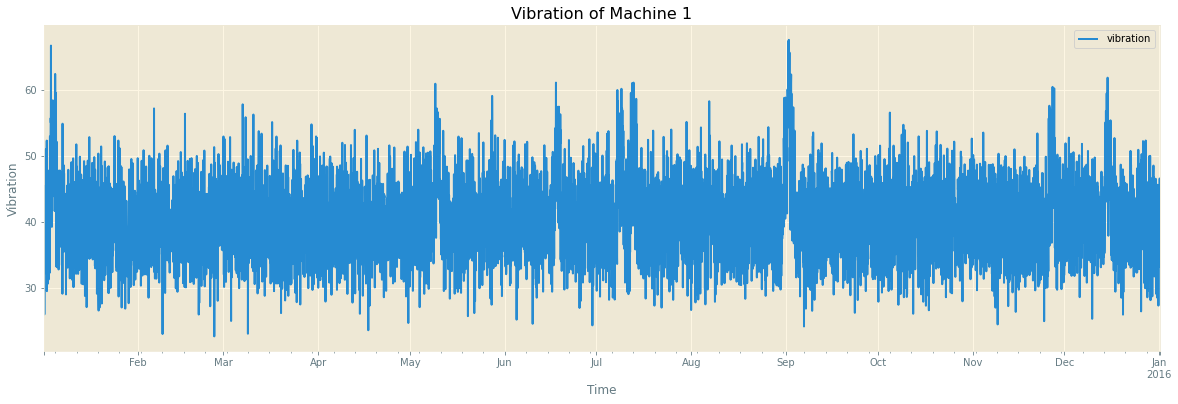

In [17]:
# Let's plot Vibrarion of Machine 1 for 2015
df_vib_machine_1 = telemetry_df[
    telemetry_df.machineID == 1][["datetime", "vibration"]].set_index("datetime")
plot_ts(df_vib_machine_1, title="Vibration of Machine 1", xlabel="Time", ylabel="Vibration")

기계 2에 대한 2015년 진동 확인

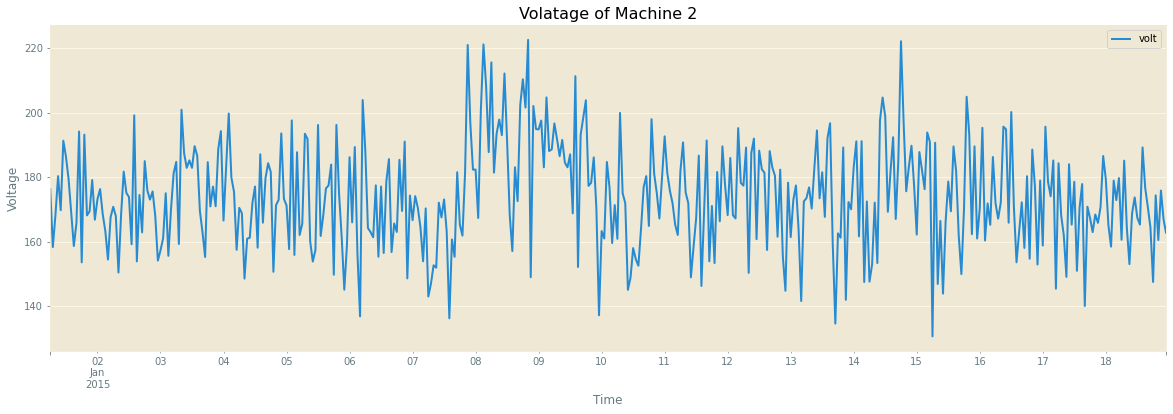

In [18]:
# Let's plot voltage of Machine 2 for 1st two weeks of 2015
df_vib_machine_1 = telemetry_df[
    (telemetry_df.machineID == 2) & (
        telemetry_df.datetime.dt.isocalendar().week.isin(
            [1, 2, 3]))][["datetime", "volt"]].set_index("datetime")
plot_ts(df_vib_machine_1, title="Volatage of Machine 2", xlabel="Time", ylabel="Voltage")

추가적인 정보 생성

In [19]:
telemetry_df = create_date_features(telemetry_df, telemetry_df, "datetime")
telemetry_df.head()

,datetime,machineID,volt,rotate,pressure,vibration,year,month,quarter,weekofyear,...,day,dayofweek,dayofyear,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,month_year
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,2015,1,1,1,...,1,3,1,True,False,True,False,True,False,2015-01
1,2015-01-01 06:00:00,2,176.558913,424.624162,76.005332,43.767049,2015,1,1,1,...,1,3,1,True,False,True,False,True,False,2015-01
2,2015-01-01 06:00:00,3,185.482043,461.211137,87.453199,28.216864,2015,1,1,1,...,1,3,1,True,False,True,False,True,False,2015-01
3,2015-01-01 06:00:00,4,169.710847,463.646727,95.929877,38.400372,2015,1,1,1,...,1,3,1,True,False,True,False,True,False,2015-01
4,2015-01-01 06:00:00,5,165.082899,452.283576,84.591722,40.298803,2015,1,1,1,...,1,3,1,True,False,True,False,True,False,2015-01


여러 달에 걸친 전압 그래프 생성. 이상적으로 데이터에 어느정도 계절성이 보여야 됨

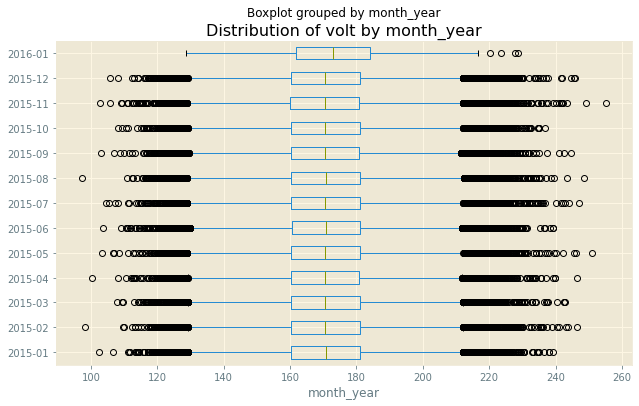

In [20]:
plot_boxh_groupby(telemetry_df, feature_name="volt", by="month_year")

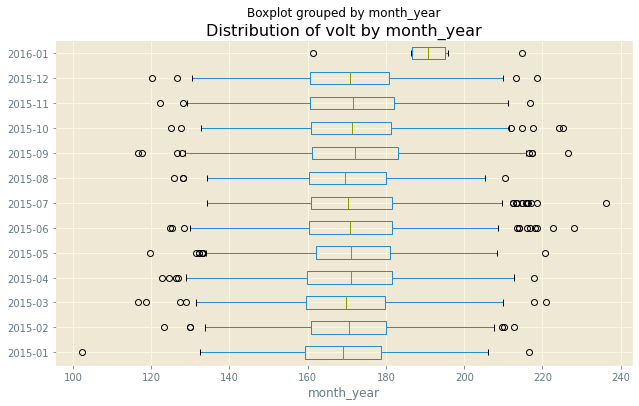

In [21]:
plot_boxh_groupby(telemetry_df[telemetry_df.machineID == 80], feature_name="volt", by="month_year")

전체 기계에 대한 전압 확인

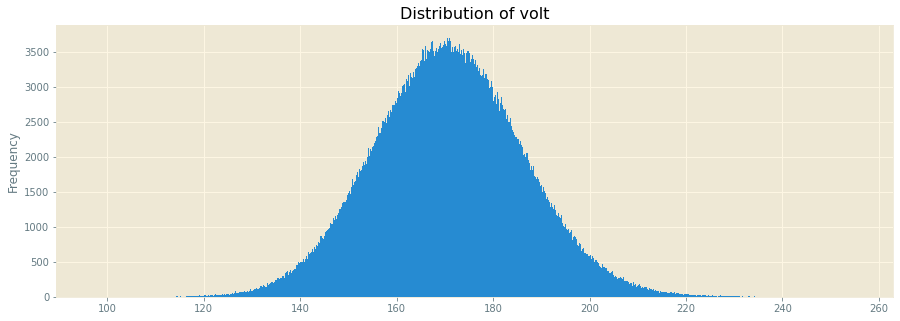

In [22]:
plot_hist(telemetry_df, feature_name="volt", log=False, bins=1000)

전체 기계에 대한 각 변수 그래프

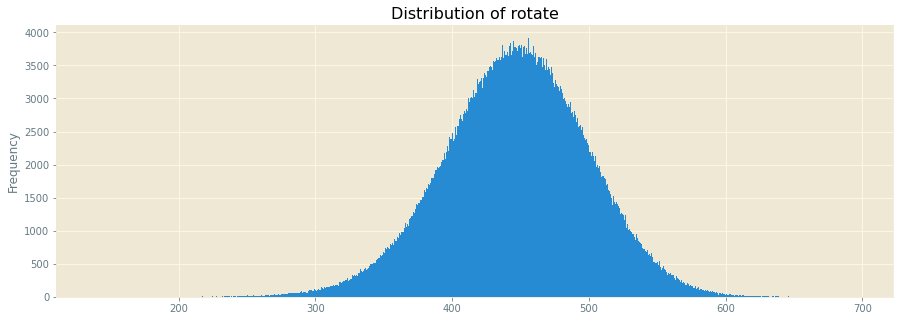

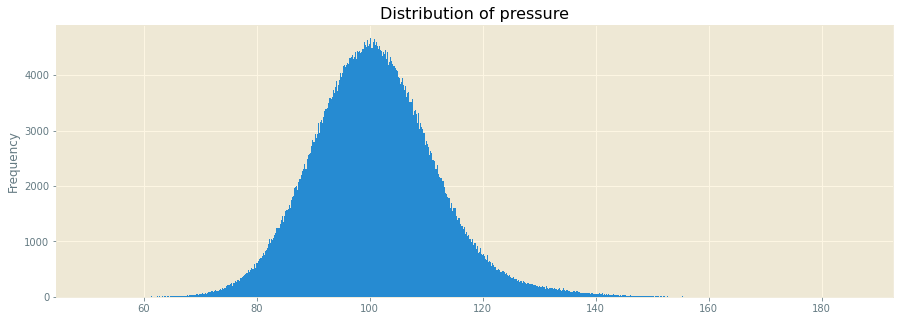

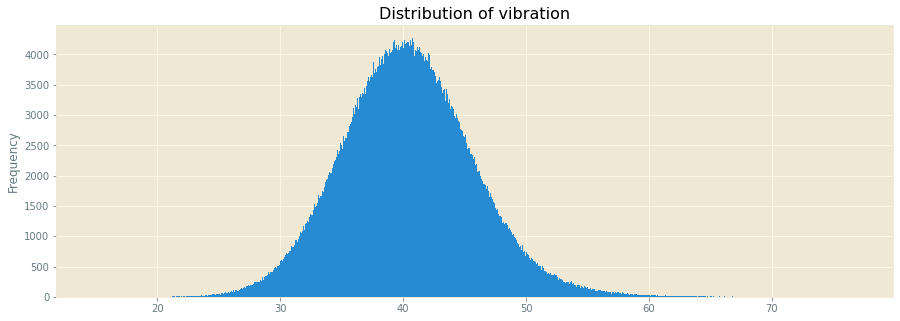

In [23]:
for name in ['rotate', 'pressure', 'vibration']:
    plot_hist(telemetry_df, feature_name=name, log=False, bins=1000)

# Error Data

In [24]:
print(f"Error 데이터 shape : {errors_df.shape}")
print("\n")
errors_df.head()

Error 데이터 shape : (3919, 3)




,datetime,machineID,errorID
0,2015-01-01 06:00:00,24,error1
1,2015-01-01 06:00:00,73,error4
2,2015-01-01 06:00:00,81,error1
3,2015-01-01 07:00:00,43,error3
4,2015-01-01 08:00:00,14,error4


In [25]:
# Sort the Error based "datetime", "machineID", "errorID" for better readability
errors_df = errors_df.sort_values(["datetime", "machineID", "errorID"]).reset_index(drop=True)

In [26]:
errors_df.machineID = errors_df.machineID.astype('category')
errors_df.errorID = errors_df.errorID.astype('category')

데이터 분포 확인

In [28]:
errors_df.datetime.describe(datetime_is_numeric=True)

count                             3919
mean     2015-07-01 03:34:18.586373888
min                2015-01-01 06:00:00
25%                2015-03-31 05:00:00
50%                2015-07-01 06:00:00
75%                2015-10-01 15:00:00
max                2016-01-01 05:00:00
Name: datetime, dtype: object

중복 확인

In [29]:
check_duplicate(errors_df, ['datetime', 'machineID', 'errorID'])

0

null 확인

In [31]:
check_null(errors_df)

datetime     0.0
machineID    0.0
errorID      0.0
dtype: float64

error 타입별 그래프

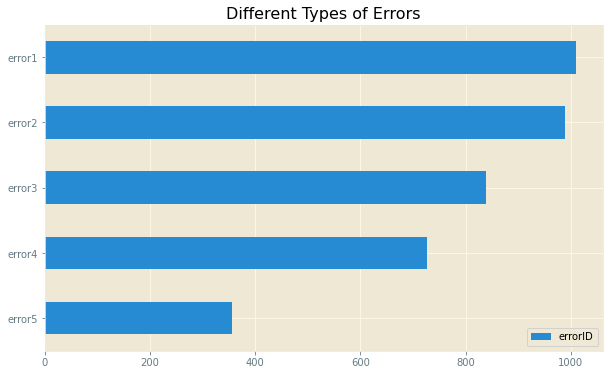

In [32]:
plot_barh(errors_df, 
          feature_name="errorID", 
          figsize=(10, 6), 
          normalize=False,
          title="Different Types of Errors")

기계별 에러발생 빈도

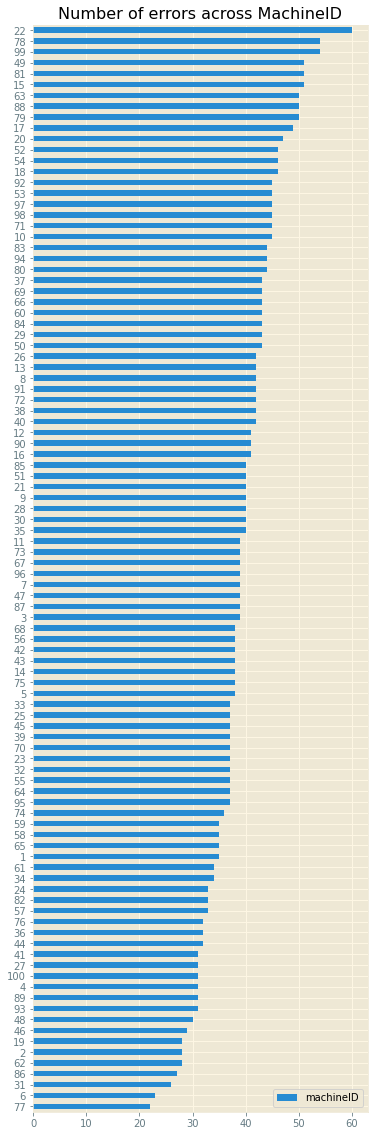

In [33]:
plot_barh(errors_df, "machineID", figsize=(6, 20), normalize=False, title="Number of errors across MachineID")

기계별 에러 발생 종류

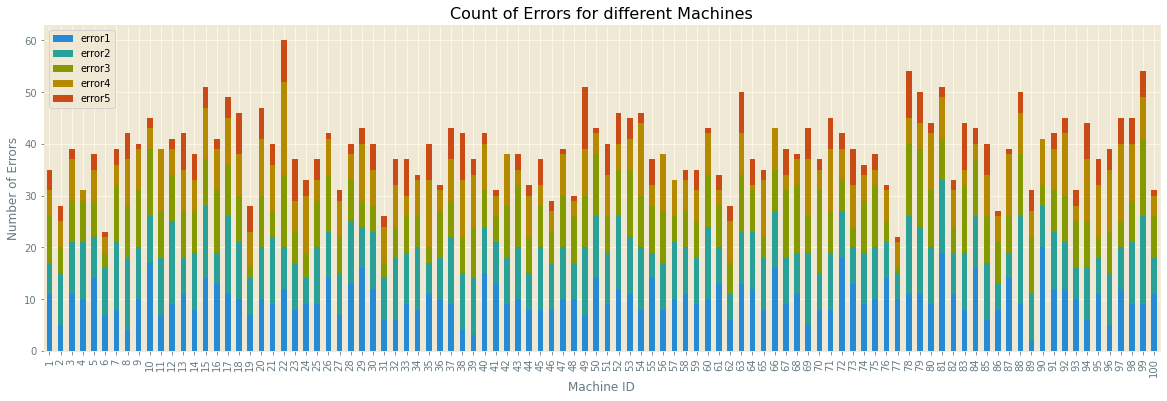

In [34]:
df_errors = errors_df.groupby(["machineID", "errorID"]).size().reset_index()
df_errors.columns = ["machineID", "errorID", "errorValues"]
#df_errors_pivot = pd.pivot(df_errors, index="machineID", columns="errorID", values="errorValues").reset_index().rename_axis(None, axis=1)
df_errors_pivot = pd.pivot(df_errors, index="machineID", columns="errorID", values="errorValues").rename_axis(None, axis=1)

df_errors_pivot.plot.bar(stacked=True, figsize=(20, 6), title="Count of Errors for different Machines")
plt.xlabel("Machine ID")
plt.ylabel("Number of Errors");